In [ ]:
# @title abrir meu drive
from google.colab import drive

drive.mount('/content/MyDrive')



Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [ ]:
# @title importar bibliotecas
import pandas as pd

import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np


In [ ]:
# @title Ler dataset diabetes
df = pd.read_csv('/content/MyDrive/My Drive/diabetes.csv')

df.head()

preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive

In [ ]:
# @title treinar base de dados
from sklearn.model_selection import train_test_split

X = df.drop(columns=['class'])
Y = df['class']

# Separando os dados em treinamento(75%) e teste(25%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)


In [ ]:
# @title arvore aleatoria
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, Y_train)

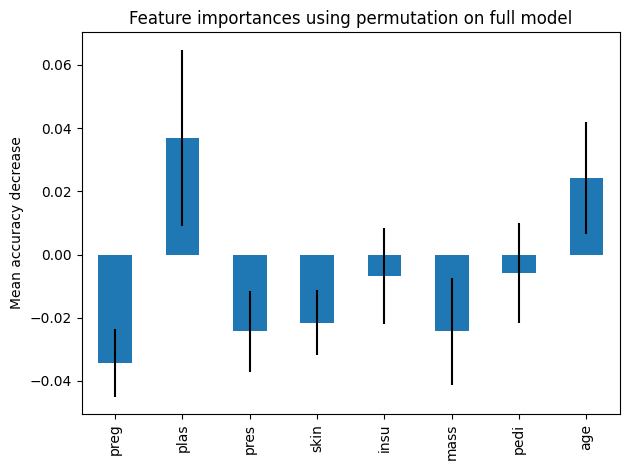

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_test, Y_test,n_repeats=30, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
# @title testando o modelo arvore aleatoria
from sklearn.metrics import accuracy_score

Yhat = rf.predict(X_test)

print("Acurácia dos dados de teste  : ", accuracy_score(Y_test,Yhat))

Acurácia dos dados de teste  :  0.703125


In [ ]:
Yhat

array(['tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_positive',
       'tested_positive', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_positive',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_positive', 'tested_positi

In [ ]:
# @title Gerar o novo dataset para interpretar o modelo (new_df = prediçoes do black box)
new_df = pd.read_csv('/content/MyDrive/My Drive/2023.2/predicao.csv')

new_df.head()

array(['tested_negative'   'tested_positive'   'tested_negative'  \
0         'tested_negative'   'tested_positive'   'tested_negative'   
1         'tested_positive'   'tested_negative'   'tested_positive'   
2         'tested_negative'   'tested_negative'   'tested_positive'   
3         'tested_negative'   'tested_positive'   'tested_negative'   
4         'tested_negative'   'tested_positive'   'tested_negative'   

   Unnamed: 3  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [ ]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)



dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 2)
dt.fit(X_test,Yhat)

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

tree_graph_to_png(dt, feature_names=X_train.columns,
                 png_file_to_save='dt.png')